# Boosting Similarity Search with Hazelcast and Qdrant - Part 1

## Introduction

The goal of similarity search and vector databases is to find similar results to the search query for unstructured data, such as text, images and videos. The unstructured data first is vectorised, and stored in a vector format. There are publically available tools to create vectors from unstructured data, similarly, there are vector databases to store and perform similarity searches. This is important because of the rising popularity of Large Language Models (LLMs) and their combination with vector databases.

Here we present a hybrid approach by taking the strengths of vector databases and boosting it with traditional search and filtering techniques based on real-time stream processing. Vector databases are good for building high-performance vector search applications. On the other hand, Hazelcast can be used for real-time stream processing and fast data storage for structured data (filters, tags and contextual data). Some vector databases offer filtering on structural data, which can be used or replaced with Hazelcast. In either case, Hazelcast can be used to enrich your query results, from additional resources.

<b>Hazelcast</b> is a real-time stream processing distributed computation and storage platform for consistently low-latency querying, aggregation and stateful computation against event streams and traditional data sources. It allows you to quickly build resource-efficient, real-time applications. You can deploy it at any scale from small edge devices to a large cluster of cloud instances. Don’t hesitate to share your experience with us in on <a href="https://slack.hazelcast.com/">Slack</a> or <a href="https://github.com/hazelcast">Github</a> repository. 

<b>Qdrant</b> is a vector similarity search engine and vector database. It provides a production-ready service with a convenient API to store, search, and manage points—vectors with an additional payload Qdrant is tailored to extended filtering support. It makes it useful for all sorts of neural network or semantic-based matching, faceted search, and other applications. You can try it out on <a href="https://github.com/qdrant/qdrant">Github</a> repository. 

<b>Note:</b> Both Hazelcast and Qdrant offer cloud solutions allowing to run this demo on the cloud with minimal setup and free accounts. Give it a try and let me know how you’re getting on <a href="https://www.linkedin.com/in/fawazghali/">@fawazghali</a>.

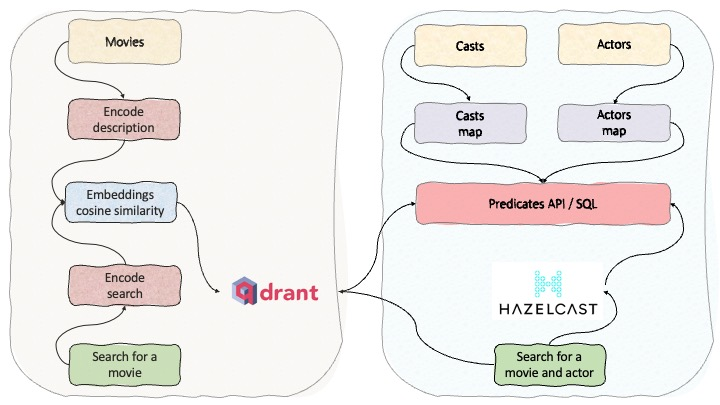

### Step 1: run Hazelcast and install the client

In [ ]:
!docker run -p 5701:5701 hazelcast/hazelcast:5.2

In [ ]:
!pip install hazelcast-python-client

### Step 2: run Qdrant and install the client

In [ ]:
!docker run -p 6333:6333 -v $(pwd)/qdrant_storage:/qdrant/storage qdrant/qdrant

In [ ]:
!pip install qdrant-client

In [ ]:
# Install SentenceTransformers for embeddings
!pip install -U sentence-transformers

In [ ]:
from qdrant_client import models, QdrantClient
from sentence_transformers import SentenceTransformer

In [ ]:
# Model to create embeddings
encoder = SentenceTransformer('all-MiniLM-L6-v2') 

In [ ]:
# Let's make a semantic search for some movies
movies = [{"id":"1","title":"Zack Snyder''s Justice League","description":"Determined to ensure Superman''s ultimate sacrifice was not in vain, Bruce Wayne aligns forces with Diana Prince with plans to recruit a team of metahumans to protect the world from an approaching threat of catastrophic proportions.","vote_count":8805},{"id":"2","title":"Requiem for a Dream","description":"The hopes and dreams of four ambitious people are shattered when their drug addictions begin spiraling out of control. A look into addiction and how it overcomes the mind and body.","vote_count":8835},{"id":"3","title":"The Shawshank Redemption","description":"Framed in the 1940s for the double murder of his wife and her lover, upstanding banker Andy Dufresne begins a new life at the Shawshank prison, where he puts his accounting skills to work for an amoral warden. During his long stretch in prison, Dufresne comes to be admired by the other inmates -- including an older prisoner named Red -- for his integrity and unquenchable sense of hope.","vote_count":23695},{"id":"4","title":"Totò, Peppino e la... malafemmina","description":"Antonio, Peppino and Lucia are three brothers who live in the country near Naples. Lucia''s son, Gianni, goes to Naples to study medicine, but there he knows a ballet dancer. They fall in love and, when she goes to Milan, Gianni follows her. Informed of this and afraid that their nephew will stop studying, the three Caponi brothers leave for Milan to persuade Gianni to come back and continue studying and abandon the \"Malafemmina\" (bad girl).","vote_count":305},{"id":"5","title":"Modern Times","description":"The Tramp struggles to live in modern industrial society with the help of a young homeless woman.","vote_count":3260},{"id":"16","title":"The Mitchells vs. the Machines","description":"A quirky, dysfunctional family''s road trip is upended when they find themselves in the middle of the robot apocalypse and suddenly become humanity''s unlikeliest last hope.","vote_count":2379},{"id":"15","title":"Miraculous World : New York, les héros unis","description":"Teen Parisian superheroes Ladybug and Chat Noir visit New York on a field trip and discover that superheroes exist in the United States too.","vote_count":980},{"id":"17","title":"The Apartment","description":"Bud Baxter is a minor clerk in a huge New York insurance company, until he discovers a quick way to climb the corporate ladder. He lends out his apartment to the executives as a place to take their mistresses. Although he often has to deal with the aftermath of their visits, one night he''s left with a major problem to solve.","vote_count":1923},{"id":"18","title":"Estômago","description":"In a dog-eat-dog world, Raimundo Nonato has found an alternative way to move ahead: he cooks. No matter what social strata this deceptively innocent young man inhabits, he hones his skills and sharpens his knives—and then he falls in love. Jorge''s nimble comic fable provides a smartly constructed gastronomic allegory for ambition and survival.","vote_count":218},{"id":"14","title":"Per qualche dollaro in più","description":"Two bounty hunters are in pursuit of \"El Indio,\" one of the most wanted fugitives in the western territories, and his gang.","vote_count":3412},{"id":"19","title":"The Breadwinner","description":"A headstrong young girl in Afghanistan, ruled by the Taliban, disguises herself as a boy in order to provide for her family.","vote_count":714},{"id":"20","title":"タンポポ","description":"In this humorous paean to the joys of food, a pair of truck drivers happen onto a decrepit roadside shop selling ramen noodles. The widowed owner, Tampopo, begs them to help her turn her establishment into a paragon of the \"art of noodle-soup making\". Interspersed are satirical vignettes about the importance of food to different aspects of human life.","vote_count":277},{"id":"12","title":"Life in a Year","description":"A 17 year old finds out that his girlfriend is dying, so he sets out to give her an entire life, in the last year she has left.","vote_count":1406},{"id":"13","title":"Tropa de Elite","description":"In 1997, before the visit of the pope to Rio de Janeiro, Captain Nascimento from BOPE (Special Police Operations Battalion) is assigned to eliminate the risks of the drug dealers in a dangerous slum nearby where the pope intends to be lodged.","vote_count":2032},{"id":"11","title":"Pulp Fiction","description":"A burger-loving hit man, his philosophical partner, a drug-addled gangster''s moll and a washed-up boxer converge in this sprawling, comedic crime caper. Their adventures unfurl in three stories that ingeniously trip back and forth in time.","vote_count":25086},{"id":"10","title":"L''Armée des ombres","description":"Betrayed by an informant, Philippe Gerbier finds himself trapped in a torturous Nazi prison camp. Though Gerbier escapes to rejoin the Resistance in occupied Marseilles, France, and exacts his revenge on the informant, he must continue a quiet, seemingly endless battle against the Nazis in an atmosphere of tension, paranoia and distrust.","vote_count":535},{"id":"9","title":"Scooby-Doo! and KISS: Rock and Roll Mystery","description":"Get ready to Rock! Scooby-Doo and the Mystery Inc. Gang team up with the one and only KISS in this all-new, out-of-this-world adventure! We join the Gang at KISS World – the all-things-KISS theme park, as they investigate a series of strange hauntings. With help from KISS, they discover that the Crimson Witch has returned to summon The Destroyer from the alternate dimension of Kissteria! The evil duos ghastly plan, to destroy the earth! Can the Gang''s cunning and KISS''s power of rock save the day?!","vote_count":267},{"id":"8","title":"John Wick: Chapter 4","description":"With the price on his head ever increasing, John Wick uncovers a path to defeating The High Table. But before he can earn his freedom, Wick must face off against a new enemy with powerful alliances across the globe and forces that turn old friends into foes.","vote_count":1300},{"id":"7","title":"Ace in the Hole","description":"An arrogant reporter exploits a story about a man trapped in a cave to revitalize his career.","vote_count":554},{"id":"6","title":"Bo Burnham: Inside","description":"Stuck in COVID-19 lockdown, US comedian and musician Bo Burnham attempts to stay sane and happy by writing, shooting and performing a one-man comedy special.","vote_count":351}]

# Step 3: Use Qdrant to store movies, vectorize descriptions and do similarity search

In [ ]:
# Create in-memory Qdrant instance
qdrant = QdrantClient(":memory:") 

In [ ]:
# Create collection to store movies
qdrant.recreate_collection(
    collection_name="movies",
    vectors_config=models.VectorParams(
        size=encoder.get_sentence_embedding_dimension(), # Vector size is defined by used model
        distance=models.Distance.COSINE
    )
)

In [ ]:
# Let's vectorize descriptions
qdrant.upload_records(
    collection_name="movies",
    records=[
        models.Record(
            id=idx,
            vector=encoder.encode(doc["description"]).tolist(),
            payload=doc
        ) for idx, doc in enumerate(movies)
    ]
)

In [ ]:
# Let's now do search
hits = qdrant.search(
    collection_name="movies",
    query_vector=encoder.encode("ramen noodles").tolist(),
    limit=5
)
for hit in hits:
  print(hit.payload, "score:", hit.score)

In [ ]:
# Let's now search only for movies with vote count > 100
hits = qdrant.search(
    collection_name="movies",
    query_vector=encoder.encode("ramen noodles").tolist(),
    query_filter=models.Filter(
        must=[
            models.FieldCondition(
                key="vote_count",
                range=models.Range(
                    gte=100
                )
            )
        ]
    ),
    limit=10
)
for hit in hits:
  print(hit.payload, "score:", hit.score)

# Step 4: use Hazelcast to store casts and actors, perform SQL on movies, casts and actors

### With Hazelcast
Up to here, we used Qdrant for similarity search and filtered results with predefined attributes defined in the payload. If we want to boost this similarity search with features that do not belong to vectors or payload, we can use Hazelcast features for real-time stream processing and fast data store.  

For example, we use Qdrant for similarity search on the movies dataset by encoding the description and applying filtering on the movies' voting count. The relationship between movies and actors is many-to-many. In this demo, actors are stored in a different array and linked to movies using another array, casts.

Movies {id, title, description, vote_count}
Casts { movie_id, actor_id}
Actors { id, name, popularity}

Movies are stored and searched using Qdrant
Casts and actors are stored and searched using Hazelcast
Boosting = Hazelcast + Qdrant

Example:
<b>Case 1:</b> Have you ever forgotten the name of a movie but vaguely remember the story (“ramen noodles”)? In this case, we use Qdrant.
<b>Case 2:</b> Have you ever forgotten the name of a movie but vaguely remember the story (“ramen noodles”) but you remember an actor has an “an” in their names? In this case, we use Qdrant and Hazelcast.


In [ ]:
import hazelcast
from hazelcast.core import HazelcastJsonValue
from hazelcast.predicate import and_, greater, sql, equal


# Connect to Hazelcast cluster.
client = hazelcast.HazelcastClient()

# Create mapping
query = """
    CREATE OR REPLACE MAPPING casts (
        __key INT,
        movie_id INT,
        actor_id INT
    )
    TYPE IMap OPTIONS(
        'keyFormat' = 'int',
        'valueFormat' = 'json-flat'
    )
"""
client.sql.execute(query).result()
print("Mapping for 'cast' has been created.")

query = """
    CREATE OR REPLACE MAPPING actors (
        __key INT,
        gender INT,
        id INT,
        name VARCHAR,
        popularity DOUBLE
    )
    TYPE IMap OPTIONS(
        'keyFormat' = 'int',
        'valueFormat' = 'json-flat'
    )
"""
client.sql.execute(query).result()
print("Mapping for 'actors' has been created.")

# load actors and casts data

actors = [{"id":1,"name":"Raymond Ablack","popularity":23.508},{"id":2,"name":"Betty Gilpin","popularity":21.491},{"id":3,"name":"Harvey Keitel","popularity":23.953},{"id":4,"name":"Carl Weathers","popularity":21.926},{"id":5,"name":"Juno Temple","popularity":45.056},{"id":6,"name":"Wes Bentley","popularity":24.118},{"id":7,"name":"Sveva Alviti","popularity":33.914},{"id":8,"name":"Seung Ha","popularity":185.331},{"id":9,"name":"Mikey Madison","popularity":24.007},{"id":10,"name":"Pete Davidson","popularity":21.078},{"id":11,"name":"Billy Bob Thornton","popularity":28.2},{"id":12,"name":"Dylan Wang","popularity":42.505},{"id":13,"name":"Zoey Deutch","popularity":27.497},{"id":14,"name":"Ian McShane","popularity":33.099},{"id":15,"name":"Kerem Bürsin","popularity":35.061},{"id":16,"name":"Clancy Brown","popularity":26.832},{"id":17,"name":"Eric Cantona","popularity":55.491},{"id":18,"name":"Tiana Upcheva","popularity":24.597},{"id":19,"name":"Devan Long","popularity":25.666},{"id":20,"name":"Alex Essoe","popularity":25.792}]
casts=  [{"movie_id":1,"actor_id":1},{"movie_id":2,"actor_id":2},{"movie_id":3,"actor_id":3},{"movie_id":13,"actor_id":16},{"movie_id":4,"actor_id":4},{"movie_id":14,"actor_id":15},{"movie_id":5,"actor_id":5},{"movie_id":15,"actor_id":14},{"movie_id":6,"actor_id":6},{"movie_id":16,"actor_id":7},{"movie_id":7,"actor_id":8},{"movie_id":17,"actor_id":9},{"movie_id":8,"actor_id":10},{"movie_id":18,"actor_id":13},{"movie_id":9,"actor_id":11},{"movie_id":19,"actor_id":12},{"movie_id":10,"actor_id":17},{"movie_id":20,"actor_id":18},{"movie_id":11,"actor_id":19},{"movie_id":12,"actor_id":20},{"movie_id":1,"actor_id":3},{"movie_id":2,"actor_id":16},{"movie_id":3,"actor_id":1},{"movie_id":13,"actor_id":15},{"movie_id":4,"actor_id":5},{"movie_id":14,"actor_id":14},{"movie_id":5,"actor_id":4},{"movie_id":15,"actor_id":13},{"movie_id":6,"actor_id":8},{"movie_id":16,"actor_id":9},{"movie_id":7,"actor_id":6},{"movie_id":17,"actor_id":7},{"movie_id":8,"actor_id":11},{"movie_id":18,"actor_id":12},{"movie_id":9,"actor_id":10},{"movie_id":19,"actor_id":13},{"movie_id":10,"actor_id":19},{"movie_id":20,"actor_id":19},{"movie_id":11,"actor_id":17},{"movie_id":12,"actor_id":18}]
actors_map = client.get_map("actors").blocking()
casts_map = client.get_map("casts").blocking()

## store data into maps
k_actors=0
for a in actors:
    actors_map.put(k_actors, HazelcastJsonValue( a))
    k_actors +=1

    
k_casts=0
for c in casts:
    casts_map.put(k_casts, HazelcastJsonValue( c))
    k_casts +=1
    
## get me all movies about “ramen noodles” that have actors with an “an” in their names and popularity > 9
for hit in hits:
    movie = hit.payload    
    predicate_castid=equal("movie_id", movie['id'])
    print(predicate_castid)
    casts_predict = casts_map.values(predicate_castid)
    for value in casts_predict:
        predicate = and_(equal("id",value.loads()['actor_id']), greater("popularity", 9),sql("name like %an%"))
        actors_names = actors_map.values(predicate)
        for actors_name in actors_names:
            print(actors_name.to_string())
        
    
    


client.shutdown()



So here you have it, boosting similarity search with Hazelcast and Qdrant. Combining the strengths and advantages of vector databases and real-time stream processing provides a unique developer experience and an efficient way of processing data in real-time at scale. If you find this content useful, give it a try and let me know how you’re getting on <a href="https://www.linkedin.com/in/fawazghali/">@fawazghali</a>. Stay tuned for Part 2 where I’ll cover how you can ingest, enrich, predict and act on your data in a simplified but efficient approach.